In [ ]:
import pandas as pd

In [ ]:
weather = pd.read_csv('https://raw.githubusercontent.com/Hemanthkaruturi/python_for_datascience/master/data/weather.csv', low_memory=False)

In [ ]:
weather.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,1,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,2,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,3,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,4,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,5,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [ ]:
RFM = pd.read_excel('https://github.com/Hemanthkaruturi/python_for_datascience/blob/master/data/RFM%20part2.xlsx?raw=true')

In [ ]:
RFM.head()

,Customer ID,Purchase Date,Purchase Value,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,10001,2016-07-31,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10002,2015-03-12,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10002,2015-11-16,42,NaN,NaN,NaN,NaN,NaN,NaN,RFM is a method used for analyzing customer va...,NaN,NaN,NaN
3,10003,2016-09-19,171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10004,2016-10-08,26,NaN,NaN,NaN,NaN,NaN,NaN,Recency - How recently did the customer purchase?,NaN,NaN,NaN


In [ ]:
RFM = RFM.iloc[:,:3]

In [ ]:
RFM.head()

,Customer ID,Purchase Date,Purchase Value
0,10001,2016-07-31,54
1,10002,2015-03-12,86
2,10002,2015-11-16,42
3,10003,2016-09-19,171
4,10004,2016-10-08,26


#### Handling missing values

In [ ]:
RFM.isnull().sum()

Customer ID       0
Purchase Date     0
Purchase Value    0
dtype: int64

In [4]:
import pandas as pd
adv = pd.read_csv('https://raw.githubusercontent.com/Hemanthkaruturi/python_for_datascience/master/data/Advertising_Missing.csv')

In [5]:
adv.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,NaN,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
adv.isnull().sum()

Unnamed: 0    0
TV            3
radio         4
newspaper     2
sales         1
dtype: int64

In [ ]:
adv = adv.drop(columns=['Unnamed: 0'])

In [ ]:
adv[adv['TV'].isnull()]

,TV,radio,newspaper,sales
3,NaN,41.3,58.5,18.5
99,NaN,41.7,45.9,17.2
187,NaN,28.7,18.2,17.3


In [ ]:
adv[adv['TV'].isnull() == False]

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,NaN,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
adv_no_missing = adv.loc[adv['TV'].isnull() == False,:]

In [ ]:
adv_no_missing.isnull().sum()

TV           0
radio        4
newspaper    2
sales        1
dtype: int64

In [ ]:
adv_no_nulls = adv.dropna()

In [ ]:
adv_no_nulls.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [ ]:
adv[adv['TV'].isnull()]

,TV,radio,newspaper,sales
3,NaN,41.3,58.5,18.5
99,NaN,41.7,45.9,17.2
187,NaN,28.7,18.2,17.3


In [ ]:
adv.loc[adv['TV'].isnull(), 'TV']

3     NaN
99    NaN
187   NaN
Name: TV, dtype: float64

In [ ]:
import numpy as np

adv.loc[adv['TV'].isnull(), 'TV'] = np.mean(adv['TV'])

In [ ]:
adv.isnull().sum()

TV           0
radio        4
newspaper    2
sales        1
dtype: int64

In [ ]:
# from sklearn.preprocessing.impute from SimpleImputer
from sklearn.impute import SimpleImputer

impute = SimpleImputer(strategy='mean')
adv_simple = impute.fit_transform(adv)

In [ ]:
adv_simple

array([[230.1       ,  37.8       ,  69.2       ,  22.1       ],
       [ 44.5       ,  39.3       ,  45.1       ,  10.4       ],
       [ 17.2       ,  45.9       ,  69.3       ,   9.3       ],
       [146.85634518,  41.3       ,  58.5       ,  18.5       ],
       [180.8       ,  10.8       ,  58.4       ,  12.9       ],
       [  8.7       ,  48.9       ,  75.        ,   7.2       ],
       [ 57.5       ,  32.8       ,  23.5       ,  11.8       ],
       [120.2       ,  19.6       ,  11.6       ,  13.2       ],
       [  8.6       ,   2.1       ,   1.        ,   4.8       ],
       [199.8       ,   2.6       ,  21.2       ,  10.6       ],
       [ 66.1       ,   5.8       ,  24.2       ,   8.6       ],
       [214.7       ,  24.        ,   4.        ,  17.4       ],
       [ 23.8       ,  35.1       ,  65.9       ,   9.2       ],
       [ 97.5       ,   7.6       ,   7.2       ,   9.7       ],
       [204.1       ,  32.9       ,  46.        ,  19.        ],
       [195.4       ,  47

In [ ]:
type(adv_simple)

numpy.ndarray

In [ ]:
adv_simple = pd.DataFrame(adv_simple, columns=adv.columns)

In [ ]:
adv_simple.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
np.nan

nan

In [ ]:
impute = IterativeImputer(max_iter=10)

In [ ]:
adv_iim = impute.fit_transform(adv)

In [ ]:
adv_iim = pd.DataFrame(adv_iim, columns=adv.columns)

In [6]:
from sklearn.impute import KNNImputer
impute = KNNImputer(n_neighbors=2)
impute.fit_transform(adv)

array([[  1.  , 230.1 ,  37.8 ,  69.2 ,  22.1 ],
       [  2.  ,  44.5 ,  39.3 ,  45.1 ,  10.4 ],
       [  3.  ,  17.2 ,  45.9 ,  69.3 ,   9.3 ],
       [  4.  , 123.65,  41.3 ,  58.5 ,  18.5 ],
       [  5.  , 180.8 ,  10.8 ,  58.4 ,  12.9 ],
       [  6.  ,   8.7 ,  48.9 ,  75.  ,   7.2 ],
       [  7.  ,  57.5 ,  32.8 ,  23.5 ,  11.8 ],
       [  8.  , 120.2 ,  19.6 ,  11.6 ,  13.2 ],
       [  9.  ,   8.6 ,   2.1 ,   1.  ,   4.8 ],
       [ 10.  , 199.8 ,   2.6 ,  21.2 ,  10.6 ],
       [ 11.  ,  66.1 ,   5.8 ,  24.2 ,   8.6 ],
       [ 12.  , 214.7 ,  24.  ,   4.  ,  17.4 ],
       [ 13.  ,  23.8 ,  35.1 ,  65.9 ,   9.2 ],
       [ 14.  ,  97.5 ,   7.6 ,   7.2 ,   9.7 ],
       [ 15.  , 204.1 ,  32.9 ,  46.  ,  19.  ],
       [ 16.  , 195.4 ,  47.7 ,  52.9 ,  22.4 ],
       [ 17.  ,  67.8 ,  36.6 , 114.  ,  12.5 ],
       [ 18.  , 281.4 ,  39.6 ,  55.8 ,  24.4 ],
       [ 19.  ,  69.2 ,  20.5 ,  18.3 ,  11.3 ],
       [ 20.  , 147.3 ,  23.9 ,  19.1 ,  14.6 ],
       [ 21.  , 218.

#### Outlier Detection

In [7]:
boston = pd.read_csv('https://raw.githubusercontent.com/Hemanthkaruturi/python_for_datascience/master/data/Boston_housing_train.csv')

In [8]:
boston.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [9]:
boston['age'].skew(axis=0)

-0.6046436099461793

In [10]:
boston.skew(axis=0)

ID         0.064113
crim       4.598981
zn         2.374052
indus      0.290434
chas       3.720006
nox        0.705552
rm         0.284028
age       -0.604644
dis        0.938143
rad        0.983258
tax        0.633027
ptratio   -0.789838
black     -2.998422
lstat      0.978328
medv       1.122472
dtype: float64

In [13]:
Q1 = boston['crim'].quantile(0.25)

In [15]:
Q3 = boston['crim'].quantile(0.75)

In [16]:
IQR = Q3 - Q1

In [17]:
lower_limit = Q1 - 1.5*IQR

In [18]:
upper_limit = Q3 + 1.5*IQR

In [19]:
lower_limit

-5.319929999999999

In [20]:
upper_limit

9.07711

In [21]:
data_iqr = boston.copy()

In [23]:
data_iqr['crim'] = data_iqr['crim'][data_iqr['crim'] > lower_limit]

In [24]:
data_iqr['crim'] = data_iqr['crim'][data_iqr['crim'] < upper_limit]

In [25]:
data_iqr['crim'].skew(axis=0)

2.0564541943603816

#### Zscore

In [26]:
data_zscore = boston.copy()

In [31]:
import numpy as np
from scipy.stats import zscore
np.abs(zscore(data_zscore['crim'])) > 3

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [33]:
data_zscore['crim'] = data_zscore['crim'][np.abs(zscore(data_zscore['crim'])) < 3] 

In [34]:
data_zscore['crim'].skew(axis=0)

2.413382012731612

In [40]:
from sklearn.covariance import EllipticEnvelope
outs = EllipticEnvelope(contamination=0.2)
output = outs.fit_predict(boston)

In [37]:
output != -1

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
       False,  True, False,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False,  True,  True, False,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False, False, False, False, False, False,  True,  True,  True,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,

In [41]:
data_elliptic = boston[output != -1]

In [42]:
data_elliptic.skew(axis=0)

ID         0.250354
crim       2.493609
zn         2.005954
indus      0.798115
chas       3.720880
nox        1.005351
rm         0.965334
age       -0.319418
dis        0.746909
rad        1.630646
tax        1.134150
ptratio   -0.684324
black     -2.647541
lstat      1.065498
medv       1.240968
dtype: float64

In [44]:
from sklearn.ensemble import IsolationForest
outs = IsolationForest(contamination=0.5)
output = outs.fit_predict(boston)

In [45]:
data_isf = boston[output != -1]

In [46]:
data_isf.skew(axis=0)

ID         0.223485
crim       2.330716
zn         2.529996
indus      0.377992
chas       0.000000
nox        0.635000
rm         0.057280
age       -0.631378
dis        0.720199
rad        1.160658
tax        0.799487
ptratio   -0.657721
black     -5.366258
lstat      0.647677
medv       0.236923
dtype: float64

### Normalization

In [48]:
from sklearn.preprocessing import normalize
data_normalize = normalize(boston)

In [49]:
from sklearn.preprocessing import scale
scale(boston)

array([[-1.69301403, -0.45687496,  0.32290583, ...,  0.43298984,
        -1.06777158,  0.13441853],
       [-1.68624067, -0.45401577, -0.47212294, ...,  0.43298984,
        -0.47829937, -0.12759925],
       [-1.67269396, -0.45332651, -0.47212294, ...,  0.40673324,
        -1.35683968,  1.16065484],
       ...,
       [ 1.70721164, -0.45156931, -0.47212294, ...,  0.43298984,
        -0.48680137, -0.23677333],
       [ 1.713985  , -0.4494593 , -0.47212294, ...,  0.43298984,
        -0.97424954,  0.12350112],
       [ 1.72753171, -0.4512778 , -0.47212294, ...,  0.43298984,
        -0.65684143, -1.18658778]])

In [50]:
from sklearn.preprocessing import MaxAbsScaler
MaxAbsScaler(boston)

MaxAbsScaler(copy=      ID     crim    zn  indus  chas  ...  tax  ptratio   black  lstat  medv
0      1  0.00632  18.0   2.31     0  ...  296     15.3  396.90   4.98  24.0
1      2  0.02731   0.0   7.07     0  ...  242     17.8  396.90   9.14  21.6
2      4  0.03237   0.0   2.18     0  ...  222     18.7  394.63   2.94  33.4
3      5  0.06905   0.0   2.18     0  ...  222     18.7  396.90   5.33  36.2
4      7  0.08829  12.5   7.87     0  ...  311     15.2  395.60  12.43  22.9
..   ...      ...   ...    ...   ...  ...  ...      ...     ...    ...   ...
328  500  0.17783   0.0   9.69     0  ...  391     19.2  395.77  15.10  17.5
329  502  0.06263   0.0  11.93     0  ...  273     21.0  391.99   9.67  22.4
330  503  0.04527   0.0  11.93     0  ...  273     21.0  396.90   9.08  20.6
331  504  0.06076   0.0  11.93     0  ...  273     21.0  396.90   5.64  23.9
332  506  0.04741   0.0  11.93     0  ...  273     21.0  396.90   7.88  11.9

[333 rows x 15 columns])

In [ ]:
# MinMaxScaler
# StandardScaler

In [51]:
from sklearn.preprocessing import QuantileTransformer
Q_transform = QuantileTransformer()
Q_transform.fit_transform(boston)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (333). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


array([[0.        , 0.        , 0.76807229, ..., 1.        , 0.11445783,
        0.68222892],
       [0.00301205, 0.05722892, 0.        , ..., 1.        , 0.37349398,
        0.5       ],
       [0.0060241 , 0.07228916, 0.        , ..., 0.62650602, 0.01506024,
        0.88855422],
       ...,
       [0.9939759 , 0.12650602, 0.        , ..., 1.        , 0.36746988,
        0.46084337],
       [0.99698795, 0.19578313, 0.        , ..., 1.        , 0.15662651,
        0.67168675],
       [1.        , 0.14457831, 0.        , ..., 1.        , 0.30722892,
        0.07831325]])

In [53]:
np.log(boston['crim'])

0     -5.064036
1     -3.600502
2     -3.430523
3     -2.672924
4     -2.427128
         ...   
328   -1.726927
329   -2.770511
330   -3.095111
331   -2.800824
332   -3.048922
Name: crim, Length: 333, dtype: float64

#### Visualization

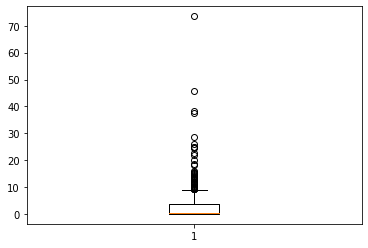

In [58]:
import matplotlib.pyplot as plt
plt.boxplot(boston['crim'])
plt.show()

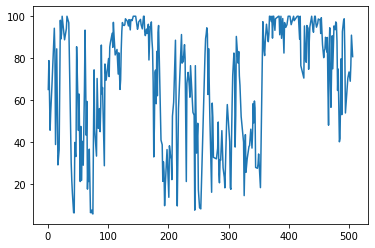

In [61]:
plt.plot(boston['ID'], boston['age'])

In [67]:
simple_data = pd.DataFrame({'Cricketer':['Rohit', 'Dhoni', 'Dhawan'], 'Score':[45,45,23]})

In [68]:
simple_data

,Cricketer,Score
0,Rohit,45
1,Dhoni,45
2,Dhawan,23


<BarContainer object of 3 artists>

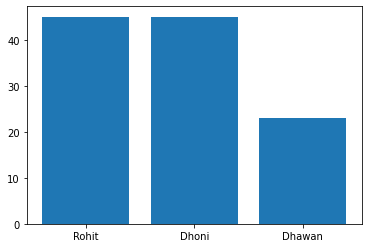

In [69]:
plt.bar(x=simple_data['Cricketer'], height=simple_data['Score'])

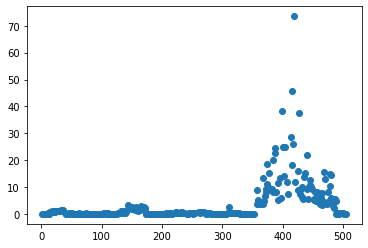

In [70]:
plt.scatter(x=boston['ID'], y=boston['crim'])

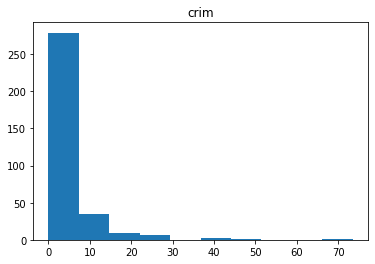

In [73]:
plt.hist(boston['crim'])
plt.title("crim")
plt.show()

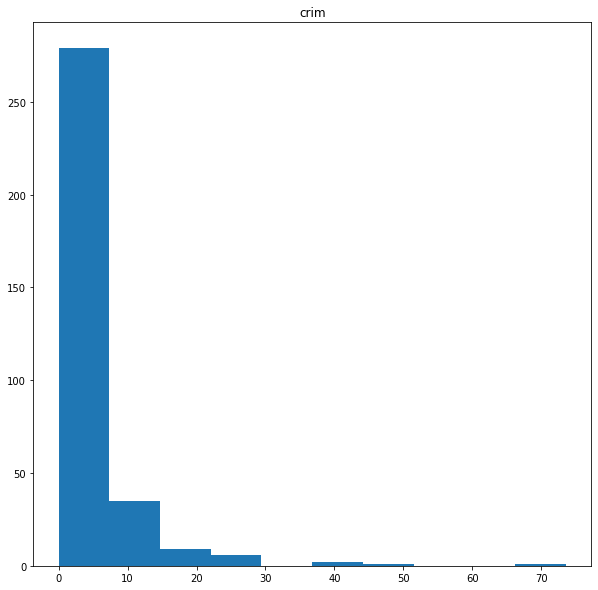

In [75]:
plt.figure(figsize=(10,10))
plt.hist(boston['crim'])
plt.title("crim")
plt.show()

In [ ]:
# seaborn